# Logistic Regression from scratch

In [1]:
import numpy as np
from scipy.optimize import minimize

In [87]:
# defining the sigmoid function

def logReg( X, theta):
    h = 1 / (1 + np.exp(-(np.dot(X,theta.transpose()))))
    return h

In [3]:
#defining the cost function 

def costfunc(h,y):
    loss = (-y * np.log(h) - (1-y)*np.log(1 - h))
    cost = np.mean(loss)
    return cost

In [4]:
# optimising the cost function

def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y))/y.shape[0]

def updated_weighted_theta(theta, learning_rate, gradient):
    return (theta - learning_rate * gradient)

In [80]:
# Unitng everything in a class

class LogisticRegression:
    
    def __init__(self,X,theta):
        self.X = X
        self.theta = theta
    
    def logReg( X, theta):
        h = 1 / (1 + np.exp(-(np.dot(X,theta))))
        return h

    def costfunc(h,y):
        loss = (-y * np.log(h) - (1-y)*np.log(1 - h))
        cost = np.mean(loss)
        return cost

    def gradient_descent(X, h, y):
        return np.dot(X.T, (h - y))/y.shape[0]

    def updated_weighted_theta(theta, learning_rate, gradient):
        return (theta - learning_rate * gradient)

In [6]:
#loading data

import pandas as pd

data = pd.read_csv(r'C:\Users\Administrator\Desktop\Python Test Data\Telco Customer churn\customer_churn.csv')


In [7]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Figure size 1008x432 with 0 Axes>

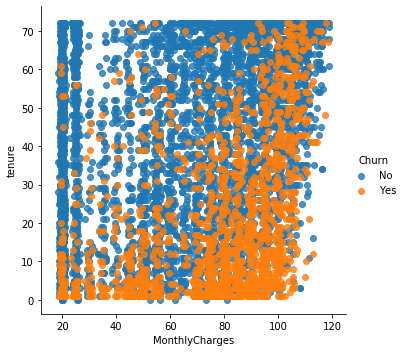

<Figure size 1008x432 with 0 Axes>

In [13]:
#using only tenure and monthly charges as features and churn as target variable

import seaborn as sns
import matplotlib.pyplot as plt


sns.lmplot(y = 'tenure', x= 'MonthlyCharges', data = data, fit_reg= False,hue = 'Churn')
plt.figure(figsize=[14,6])

In [16]:
#creating a seperate dataframe
new_df = data[['tenure', 'MonthlyCharges', 'Churn']]

In [17]:
new_df.head()

,tenure,MonthlyCharges,Churn
0,1,29.85,No
1,34,56.95,No
2,2,53.85,Yes
3,45,42.30,No
4,2,70.70,Yes


In [60]:
X1 = new_df['tenure'].values

print(X1.shape)
print(X1.reshape(-1,1).shape)

X1 = X1.reshape(-1,1)

X2 = new_df['MonthlyCharges'].values

X2 = X2.reshape(-1,1)

print(X2.shape)
print(X2.reshape(-1,1).shape)
print(X1.ndim)
print(X2.ndim)

#converting Yes/No into 1/0

new_df['Churn'] = new_df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

y = new_df['Churn'].values
print(y.shape)
print(y.reshape(-1,1).shape)
y = y.reshape(-1,1)



(7043,)
(7043, 1)
(7043, 1)
(7043, 1)
2
2
(7043,)
(7043, 1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [67]:
#performing only for a single feature

#instantiating 
logreg = LogisticRegression()

In [89]:
theta = np.linspace(1,100,50).reshape(-1,1)


result  = logReg(X1,theta)

In [91]:
print(result)

[[0.73105858 0.95348763 0.99357311 ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.88079708 0.99762603 0.99995816 ... 1.         1.         1.        ]
 ...
 [0.9999833  1.         1.         ... 1.         1.         1.        ]
 [0.98201379 0.99999434 1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
